# ** Entrega Proyecto Final**

## Presentación de la empresa y problema específico

La empresa en donde se desarrolla el proyecto es Fivana S.A. La cual esta dedicada a realizar Factoring, que es una alternativa de financiamiento que se orienta de preferencia a pequeñas y medianas empresas y consiste en un contrato mediante el cual una empresa traspasa el servicio de cobranza futura de los créditos y facturas existentes a su favor y a cambio obtiene de manera inmediata el dinero a que esas operaciones se refiere, aunque con un descuento. Su objetivo es dar liquidez de forma inmediata a partir de un ingreso futuro.

El problema que aqueja a la empresa se encuentra en el área de marketing y comercial, dado que las campañas de marketing y ofertas comerciales no son lo suficientemente especificas a un tipo de cliente. Uno de los clientes que más aquejan a la empresa son aquellos llamados como "Clientes Fugados", estos se definen como aquellos clientes que alguna vez se han financiado en la empresa pero que en los ultimos tres meses no han realizado ninguna operación.

Para Fivana los Clientes Fugados son un problema importante ya que no tienen alguna forma de anticipar a que un cliente no realicé ninguna operación durante tres meses, por lo que no pueden generar campañas para evitar que el cliente se fuge. Por lo tanto encontrar la probabilidad de un cliente fugado puede generar grandes grandes beneficios para la empresa, sobretodo para obtener una cartera de clientes mucho más fidelizada y que frecuente negociaciones con Fivana.

## Preguntas y objetivos de la investigación

### Objetivo de la Investigación



---


Construir modelos de clasificación basados en datos para estimar si un cliente de Fivana se va fugar o no.


### Preguntas de la investigación

1. ¿Que datos son necesarios?
2. ¿Que variables están correlacionadas?
3. ¿Que variable va a definir si un cliente se fuga?




## Conformación del Equipo de Trabajo

Integrantes:

1.   Ariel Sanabria Portillo
2.   Nicolás Morales Herrera


## Data Acquisition 

Enfocandonos en el problema a solucionar se dio principal importancia a los datos de clientes, en torno a las caracteristicas propias de cada cliente (datos cualitativos), comportamiento de facturación y comportamiento de operacion, por lo tanto se definieron tres datasets que tienen como origen los sistemas de información de la empresa. Los cuales son los siguientes:



1.   Clientes: Se compone de toda la información categorica que posee la empresa acerca de un cliente.
2.   Operaciones: Es el comportamiento de los financiamientos que a obtenido el cliente con fivana.
3. Facturación: Es el comportamiento de facturación de un cliente a nivel mensual, detallando la cantidad de facturas emitidas y el monto total.

La fuente de información se compone de dos partes, la primera es un portal creado por la empresa para la operación de los ejecutivos comerciales, llamado "Admin" el cual se sostiene de una base no relacional en Elastic Search. Desde "Admin" se obtiene la información de clientes ya que es una base de datos pequeña y tiene una buena calidad. Por otro lado la información de la facturación y operación es de gran tamaño, ya que por cada cliente se tiene el detalle de los documentos facturados, por lo que "Admin" no soporta su descarga. Dada dicha situación, Fivana tiene habilitada una base de datos relacional en Memslq, donde se generaron las consultas para descargar la información faltante.




## Data Wrangling y EDA

### Importamos las librerias a utilizar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


### 1.Descubrimiento:

In [ ]:
# GENERAMOS UN DF POR CADA FUENTE
URL='https://docs.google.com/spreadsheets/d/e/2PACX-1vRhcD3GTvBtOhv7TZBGL3fUEO8ve4lo2qLM-_CiIEtGMQgsmF2bYLeojL-yfDO90DIEdf6qT9HIIS0H/pub?gid=1204916006&single=true&output=csv'
URL2='https://docs.google.com/spreadsheets/d/e/2PACX-1vTVSVHKg47qhna2aj0kIcOGmtEToNf9_Qh6_ANTNUXOEOSg08VXPxZzduyrlPg6TpyQwebhJZBsnEFT/pub?gid=640557928&single=true&output=csv'
URL3='https://docs.google.com/spreadsheets/d/e/2PACX-1vTuR9OVeezwjg3aHz7y6NRVrHZQt8D56ouyKn9LXw7qmOefIazGAbTac5S8twl9Ig/pub?gid=854984651&single=true&output=csv'
df_ope=pd.read_csv(URL)
df_fact=pd.read_csv(URL2)
dfclientes=pd.read_csv(URL3)

In [ ]:
# Veamos las primeras 5 filas
print(df_fact.head())
print("\n")
print(df_ope.head())
print("\n")
print(dfclientes.head())

   client_rut fecha_añomes_Emisión  Cant_doc  monto_facturado
0  76559309-3              1970-01         1     2.677500e+05
1  76195807-0              2001-02         1     6.703560e+05
2  76875601-5              2010-07         1     3.760238e+07
3  76893766-4              2010-09        22     9.724335e+09
4  76292477-3              2015-04         1     1.755300e+04


  customer_rut fecha_ope  Cant_op  Monto_financiado  prom_tasa
0   76969136-7   2021-05        1         2589011.0       2.20
1   76855912-0   2020-03        1         5888605.0       2.00
2   76846339-5   2019-02        1        13489325.0       2.10
3   77408732-K   2021-09        1        27093325.0       1.40
4   76767725-1   2021-11        5        13567936.0       1.79


          Rut                                   Razón Social Calif.  \
0  77148301-1                      SIDERALL TECHNOLOGIES SPA      2   
1  77415563-5  ASESORÍA Y COMERCIALIZADORA FERRADA ACUÑA SPA      3   
2  77109088-5                    

In [ ]:
# Veamos las ultimas 5 filas
print(df_fact.tail())
print("\n")
print(df_ope.tail())
print("\n")
print(dfclientes.tail())

        client_rut fecha_añomes_Emisión  Cant_doc  monto_facturado
470961  76793034-8                  NaN         1              NaN
470962  78950240-4                  NaN         1              0.0
470963  77078139-6                  NaN         3              NaN
470964  76029926-K                  NaN         6              NaN
470965  79934380-0                  NaN         1              NaN


      customer_rut fecha_ope  Cant_op  Monto_financiado  prom_tasa
10454   77273238-4   2022-02        1         1880248.0        1.5
10455   76937142-7   2019-12        2        14912091.0        1.2
10456    8018877-3   2020-09        5        60203637.0        1.8
10457   78823470-8   2022-02        2        10246575.0        1.5
10458   76489495-2   2021-02        1        16717239.0        1.5


             Rut                                       Razón Social Calif.  \
7448  16950002-9                       RONALD KEVIN CONTRERAS MUNOZ      3   
7449  86454800-8                    

En las ultimas 5 filas, se aprecian registros null, en el df_fact en las columnas fecha_añomes_Emisión y monto_facturado, por lo que se tendrán que analizar los datos con dichas caracteristicas.

In [ ]:
#Dimensión de los dataset
print(df_fact.shape)
print("\n")
print(df_ope.shape)
print("\n")
print(dfclientes.shape)

(470966, 4)


(10459, 5)


(7453, 21)


Todos los DF tienen diferente forma por lo que combinarlos en la forma de unión no es viable, ademas vemos la gran diferencia de filas de los 3 df.

In [ ]:
# Veamos el nombre y el tipo de cada columna de los DF
print(df_fact.info())
print("\n")
print(df_ope.info())
print("\n")
print(dfclientes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470966 entries, 0 to 470965
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_rut            470964 non-null  object 
 1   fecha_añomes_Emisión  470257 non-null  object 
 2   Cant_doc              470966 non-null  int64  
 3   monto_facturado       470489 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 14.4+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_rut      10458 non-null  object 
 1   fecha_ope         10458 non-null  object 
 2   Cant_op           10459 non-null  int64  
 3   Monto_financiado  10458 non-null  float64
 4   prom_tasa         10458 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 408.7+ KB
None




Una caracterista es que el dfclientes tiene solo variables categoricas, este df corresponde a toda la información cualitativa del cliente y también es aquel que contiene más columnas. 


In [ ]:
#Verificar si existen duplicados
print(df_fact.duplicated())
print("\n")
print(df_ope.duplicated())
print("\n")
print(dfclientes.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
470961    False
470962    False
470963    False
470964    False
470965    False
Length: 470966, dtype: bool


0        False
1        False
2        False
3        False
4        False
         ...  
10454    False
10455    False
10456    False
10457    False
10458    False
Length: 10459, dtype: bool


0       False
1       False
2       False
3       False
4       False
        ...  
7448    False
7449    False
7450    False
7451    False
7452    False
Length: 7453, dtype: bool


Los DF no poseen duplicados

### Limpieza

In [ ]:
#Verificamos los nulos en facturacion
Valores_nulos_fact=df_fact[df_fact['fecha_añomes_Emisión'].isnull()&df_fact['monto_facturado'].isnull()]
print("Valores nulos de Base de Facturacion")
print(Valores_nulos_fact.shape)
print('\n')
print(Valores_nulos_fact)



Valores nulos de Base de Facturacion
(477, 4)


        client_rut fecha_añomes_Emisión  Cant_doc  monto_facturado
470259  76424156-8                  NaN         1              NaN
470260  77077269-9                  NaN         1              NaN
470262  76978324-5                  NaN         1              NaN
470263  77151778-1                  NaN         3              NaN
470264  77057293-2                  NaN         6              NaN
...            ...                  ...       ...              ...
470960  77013857-4                  NaN         1              NaN
470961  76793034-8                  NaN         1              NaN
470963  77078139-6                  NaN         3              NaN
470964  76029926-K                  NaN         6              NaN
470965  79934380-0                  NaN         1              NaN

[477 rows x 4 columns]


Eliminamos los valores de la base de Facturacion, que posean nulos dentro de los campos de fecha de facturacion y montos facturados.

In [ ]:

df_fact2=df_fact.dropna(subset=['fecha_añomes_Emisión','fecha_añomes_Emisión'])
df_fact2=df_fact2.dropna(subset=['client_rut'])

Valores_nulos_fact2=df_fact2[df_fact2['fecha_añomes_Emisión'].isnull()&df_fact['monto_facturado'].isnull()]
print("Valores nulos de Base de Facturacion")
print(Valores_nulos_fact2.shape)
print('\n')
print(df_fact2.isnull().sum())


Valores nulos de Base de Facturacion
(0, 4)


client_rut              0
fecha_añomes_Emisión    0
Cant_doc                0
monto_facturado         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


### Eliminamos los valores de la base de Operaciones, que posean nulos dentro de los campos de fecha de cantidad de operaciones, monto financiado y tasa promedio.

In [ ]:
control1=df_ope[df_ope["Cant_op"].isnull()&df_ope["Monto_financiado"].isnull()&df_ope["prom_tasa"].isnull()]
print("Vemos si existen nulos entre las combinaciones Cant_op - Monto_financiado - prom_tasa")
print(control1.shape)
print('\n')
print("Vemos si existen nulos entre las combinaciones Cant_op - Monto_financiado")
control2=df_ope[df_ope["Cant_op"].isnull()&df_ope["Monto_financiado"].isnull()]
print(control2.shape)
print('\n')
print(df_ope.isnull().sum())

Vemos si existen nulos entre las combinaciones Cant_op - Monto_financiado - prom_tasa
(0, 5)


Vemos si existen nulos entre las combinaciones Cant_op - Monto_financiado
(0, 5)


customer_rut        1
fecha_ope           1
Cant_op             0
Monto_financiado    1
prom_tasa           1
dtype: int64


In [ ]:
df_ope2=df_ope.dropna()
df_ope2.isnull().sum()

customer_rut        0
fecha_ope           0
Cant_op             0
Monto_financiado    0
prom_tasa           0
dtype: int64

In [ ]:
print(df_ope2.dtypes)
print('\n')
print(df_fact2.dtypes)

customer_rut         object
fecha_ope            object
Cant_op               int64
Monto_financiado    float64
prom_tasa           float64
dtype: object


client_rut               object
fecha_añomes_Emisión     object
Cant_doc                  int64
monto_facturado         float64
dtype: object


In [ ]:
print(df_ope2.info())
print('\n')
print(df_fact2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10458 entries, 0 to 10458
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_rut      10458 non-null  object 
 1   fecha_ope         10458 non-null  object 
 2   Cant_op           10458 non-null  int64  
 3   Monto_financiado  10458 non-null  float64
 4   prom_tasa         10458 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 490.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 470256 entries, 0 to 470256
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_rut            470256 non-null  object 
 1   fecha_añomes_Emisión  470256 non-null  object 
 2   Cant_doc              470256 non-null  int64  
 3   monto_facturado       470256 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 34.1+ MB
None


In [ ]:
df_ope2.describe().T

,count,mean,std,min,25%,50%,75%,max
Cant_op,10458.0,1.993115e+00,1.723208e+00,1.0,1.0,1.00,2.00,2.300000e+01
Monto_financiado,10458.0,2.535720e+07,5.560267e+07,0.0,3730344.0,9461380.00,24055245.75,1.047827e+09
prom_tasa,10458.0,1.675953e+00,6.208060e-01,0.0,1.5,1.75,2.00,5.950000e+00


In [ ]:
df_fact2.describe().T

,count,mean,std,min,25%,50%,75%,max
Cant_doc,470256.0,4.814282e+00,1.903999e+01,1.0,1.00,2.0,4.0,7.720000e+02
monto_facturado,470256.0,1.282798e+07,2.627975e+08,-9974866.0,428398.25,1746420.0,6854400.0,1.142034e+11


### Armamos una sola base para poder realizar los analisis correspondientes.

In [ ]:
df_total=pd.merge(df_fact2,df_ope2 ,how="inner",left_on=['client_rut','fecha_añomes_Emisión'], right_on=['customer_rut','fecha_ope'])
df_total.head(10)

,client_rut,fecha_añomes_Emisión,Cant_doc,monto_facturado,customer_rut,fecha_ope,Cant_op,Monto_financiado,prom_tasa
0,76132820-4,2015-09,1,5045600.0,76132820-4,2015-09,1,4793320.0,0.0
1,76132820-4,2015-09,1,947240.0,76132820-4,2015-09,1,4793320.0,0.0
2,76132820-4,2015-09,3,11511643.0,76132820-4,2015-09,1,4793320.0,0.0
3,76112169-3,2015-09,1,1356474.0,76112169-3,2015-09,1,20805722.0,0.0
4,76112169-3,2015-09,1,1356473.0,76112169-3,2015-09,1,20805722.0,0.0
5,76112169-3,2015-09,1,6426000.0,76112169-3,2015-09,1,20805722.0,0.0
6,76112169-3,2015-09,1,1356474.0,76112169-3,2015-09,1,20805722.0,0.0
7,78824220-4,2015-09,1,1332800.0,78824220-4,2015-09,1,3427714.0,0.0
8,78824220-4,2015-09,1,338000.0,78824220-4,2015-09,1,3427714.0,0.0
9,76504426-K,2015-10,1,2841301.0,76504426-K,2015-10,1,2699236.0,0.0


In [ ]:
df_total.describe()

,Cant_doc,monto_facturado,Cant_op,Monto_financiado,prom_tasa
count,64996.000000,6.499600e+04,64996.000000,6.499600e+04,64996.000000
mean,5.696520,1.809797e+07,2.598268,3.580914e+07,1.739140
std,20.058508,2.139748e+08,2.407854,7.360795e+07,0.496592
min,1.000000,-2.738333e+06,1.000000,0.000000e+00,0.000000
25%,1.000000,8.365322e+05,1.000000,4.397859e+06,1.500000
50%,2.000000,3.094000e+06,2.000000,1.151321e+07,1.754000
75%,4.000000,1.133950e+07,3.000000,3.148240e+07,2.000000
max,626.000000,2.994632e+10,23.000000,1.047827e+09,5.950000


In [ ]:
## Unimos en un solo DF las variables númericas y categoricas

df_total_cli = pd.merge(df_total,dfclientes ,how="left",left_on=['client_rut'], right_on=['Rut'])
df_total_cli.head(10)

,client_rut,fecha_añomes_Emisión,Cant_doc,monto_facturado,customer_rut,fecha_ope,Cant_op,Monto_financiado,prom_tasa,Rut,...,Verificado por riesgo,Habilitada cesión externa,Disponible a fondo,Ha operado,Tasa preferencial,SII,Última liquidación,Teléfono,Correo,Facturadores
0,76132820-4,2015-09,1,5045600.0,76132820-4,2015-09,1,4793320.0,0.0,76132820-4,...,Verificado,No habilitada,Habilitado,Sí,-,Sí,22/04/2022,973784779,contabilidad4@mtc.cl,"Acepta, SII sin XML"
1,76132820-4,2015-09,1,947240.0,76132820-4,2015-09,1,4793320.0,0.0,76132820-4,...,Verificado,No habilitada,Habilitado,Sí,-,Sí,22/04/2022,973784779,contabilidad4@mtc.cl,"Acepta, SII sin XML"
2,76132820-4,2015-09,3,11511643.0,76132820-4,2015-09,1,4793320.0,0.0,76132820-4,...,Verificado,No habilitada,Habilitado,Sí,-,Sí,22/04/2022,973784779,contabilidad4@mtc.cl,"Acepta, SII sin XML"
3,76112169-3,2015-09,1,1356474.0,76112169-3,2015-09,1,20805722.0,0.0,76112169-3,...,No verificado,No habilitada,Habilitado,Sí,-,No,22/10/2015,22465600,fgalvez@neosc.cl,NaN
4,76112169-3,2015-09,1,1356473.0,76112169-3,2015-09,1,20805722.0,0.0,76112169-3,...,No verificado,No habilitada,Habilitado,Sí,-,No,22/10/2015,22465600,fgalvez@neosc.cl,NaN
5,76112169-3,2015-09,1,6426000.0,76112169-3,2015-09,1,20805722.0,0.0,76112169-3,...,No verificado,No habilitada,Habilitado,Sí,-,No,22/10/2015,22465600,fgalvez@neosc.cl,NaN
6,76112169-3,2015-09,1,1356474.0,76112169-3,2015-09,1,20805722.0,0.0,76112169-3,...,No verificado,No habilitada,Habilitado,Sí,-,No,22/10/2015,22465600,fgalvez@neosc.cl,NaN
7,78824220-4,2015-09,1,1332800.0,78824220-4,2015-09,1,3427714.0,0.0,78824220-4,...,No verificado,No habilitada,Habilitado,Sí,-,No,20/10/2015,26896632,pdroguett@importadoracoral.cl,NaN
8,78824220-4,2015-09,1,338000.0,78824220-4,2015-09,1,3427714.0,0.0,78824220-4,...,No verificado,No habilitada,Habilitado,Sí,-,No,20/10/2015,26896632,pdroguett@importadoracoral.cl,NaN
9,76504426-K,2015-10,1,2841301.0,76504426-K,2015-10,1,2699236.0,0.0,76504426-K,...,No verificado,No habilitada,Habilitado,Sí,-,No,20/10/2016,988296260,josehernandez316@gmail.com,NaN


Agregamos un dato de clientes fugados, segun una clasificacion por periodo. 

In [ ]:
conditionlist = [
    (df_total_cli['Última liquidación']<='2022/01/31'),
    (df_total_cli['Última liquidación']>'2022/01/31')]

choicelist = [1,0]
df_total_cli['cliente_fugado'] = np.select(conditionlist, choicelist, default=0)
df_total_cli.head(5)

,client_rut,fecha_añomes_Emisión,Cant_doc,monto_facturado,customer_rut,fecha_ope,Cant_op,Monto_financiado,prom_tasa,Rut,...,Habilitada cesión externa,Disponible a fondo,Ha operado,Tasa preferencial,SII,Última liquidación,Teléfono,Correo,Facturadores,cliente_fugado
0,76132820-4,2015-09,1,5045600.0,76132820-4,2015-09,1,4793320.0,0.0,76132820-4,...,No habilitada,Habilitado,Sí,-,Sí,22/04/2022,973784779,contabilidad4@mtc.cl,"Acepta, SII sin XML",0
1,76132820-4,2015-09,1,947240.0,76132820-4,2015-09,1,4793320.0,0.0,76132820-4,...,No habilitada,Habilitado,Sí,-,Sí,22/04/2022,973784779,contabilidad4@mtc.cl,"Acepta, SII sin XML",0
2,76132820-4,2015-09,3,11511643.0,76132820-4,2015-09,1,4793320.0,0.0,76132820-4,...,No habilitada,Habilitado,Sí,-,Sí,22/04/2022,973784779,contabilidad4@mtc.cl,"Acepta, SII sin XML",0
3,76112169-3,2015-09,1,1356474.0,76112169-3,2015-09,1,20805722.0,0.0,76112169-3,...,No habilitada,Habilitado,Sí,-,No,22/10/2015,22465600,fgalvez@neosc.cl,NaN,0
4,76112169-3,2015-09,1,1356473.0,76112169-3,2015-09,1,20805722.0,0.0,76112169-3,...,No habilitada,Habilitado,Sí,-,No,22/10/2015,22465600,fgalvez@neosc.cl,NaN,0


# Analisis Univariable

In [ ]:
print("Descripcion de Monto_financiado")
print(round(df_total_cli["Monto_financiado"].describe()/1000,2))
print("\n")
print("Descripcion de monto_facturado")
print(round(df_total_cli["prom_tasa"].describe(),2))
print("\n")
print("Descripcion de prom_tasa")
print(df_total_cli["prom_tasa"].describe())



Descripcion de Monto_financiado
count         65.00
mean       35809.14
std        73607.95
min            0.00
25%         4397.86
50%        11513.21
75%        31482.40
max      1047826.58
Name: Monto_financiado, dtype: float64


Descripcion de monto_facturado
count    64996.00
mean         1.74
std          0.50
min          0.00
25%          1.50
50%          1.75
75%          2.00
max          5.95
Name: prom_tasa, dtype: float64


Descripcion de prom_tasa
count    64996.000000
mean         1.739140
std          0.496592
min          0.000000
25%          1.500000
50%          1.754000
75%          2.000000
max          5.950000
Name: prom_tasa, dtype: float64


In [ ]:
import seaborn as sns
from seaborn import boxplot
d2=df_total_cli[['cliente_fugado',"Cant_doc","Cant_op"]]
d2["Año"]=df_total_cli["fecha_ope"].apply(lambda x: x[0:4])
d2.loc[d2.cliente_fugado==0,'Clasificacion']='No Fugado'
d2.loc[d2.cliente_fugado==1,"Clasificacion"]="Fugado"
d2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,cliente_fugado,Cant_doc,Cant_op,Año,Clasificacion
0,0,1,1,2015,No Fugado
1,0,1,1,2015,No Fugado
2,0,3,1,2015,No Fugado
3,0,1,1,2015,No Fugado
4,0,1,1,2015,No Fugado
...,...,...,...,...,...
64991,1,3,1,2022,Fugado
64992,1,1,1,2022,Fugado
64993,1,3,1,2022,Fugado
64994,1,2,1,2022,Fugado


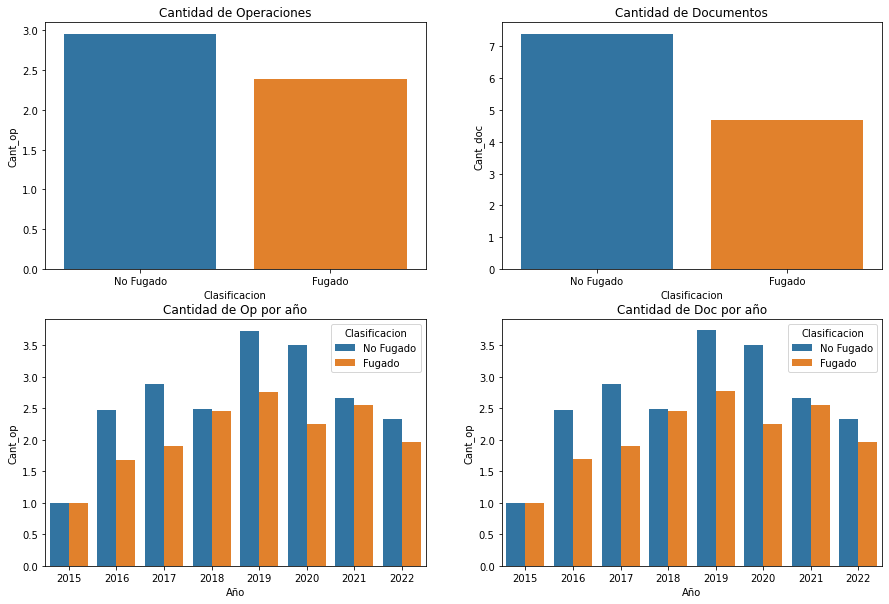

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs= plt.subplots(nrows=2,ncols=2, figsize=(15,10))
axs[0,0].set_title("Cantidad de Operaciones")
sns.barplot(x=d2['Clasificacion'],y=d2['Cant_op'],ax=axs[0,0],ci=0)
axs[0,1].set_title("Cantidad de Documentos")
sns.barplot(x=d2['Clasificacion'],y=d2['Cant_doc'],ax=axs[0,1],ci=0)
axs[1,0].set_title("Cantidad de Op por año")
sns.barplot(x=d2["Año"],ax=axs[1,0],y=d2['Cant_op'],hue=d2["Clasificacion"],ci=0)
axs[1,1].set_title("Cantidad de Doc por año")
sns.barplot(x=d2["Año"],ax=axs[1,1],y=d2['Cant_op'],hue=d2["Clasificacion"],ci=0)

In [ ]:
df_total_cli.head(5)

,client_rut,fecha_añomes_Emisión,Cant_doc,monto_facturado,customer_rut,fecha_ope,Cant_op,Monto_financiado,prom_tasa,Rut,...,Habilitada cesión externa,Disponible a fondo,Ha operado,Tasa preferencial,SII,Última liquidación,Teléfono,Correo,Facturadores,cliente_fugado
0,76132820-4,2015-09,1,5045600.0,76132820-4,2015-09,1,4793320.0,0.0,76132820-4,...,No habilitada,Habilitado,Sí,-,Sí,22/04/2022,973784779,contabilidad4@mtc.cl,"Acepta, SII sin XML",0
1,76132820-4,2015-09,1,947240.0,76132820-4,2015-09,1,4793320.0,0.0,76132820-4,...,No habilitada,Habilitado,Sí,-,Sí,22/04/2022,973784779,contabilidad4@mtc.cl,"Acepta, SII sin XML",0
2,76132820-4,2015-09,3,11511643.0,76132820-4,2015-09,1,4793320.0,0.0,76132820-4,...,No habilitada,Habilitado,Sí,-,Sí,22/04/2022,973784779,contabilidad4@mtc.cl,"Acepta, SII sin XML",0
3,76112169-3,2015-09,1,1356474.0,76112169-3,2015-09,1,20805722.0,0.0,76112169-3,...,No habilitada,Habilitado,Sí,-,No,22/10/2015,22465600,fgalvez@neosc.cl,NaN,0
4,76112169-3,2015-09,1,1356473.0,76112169-3,2015-09,1,20805722.0,0.0,76112169-3,...,No habilitada,Habilitado,Sí,-,No,22/10/2015,22465600,fgalvez@neosc.cl,NaN,0


In [ ]:
dfcli_redu=dfclientes[["Rut","Canal","Calif."]]
dfcli=pd.merge(left=dfcli_redu, right=df_total_cli, how='inner', right_on='client_rut', left_on='Rut')
dfcli.loc[dfcli.cliente_fugado==0,'Clasificacion']='No Fugado'
dfcli.loc[dfcli.cliente_fugado==1,"Clasificacion"]="Fugado"

In [ ]:
dfcli.columns.values

array(['Rut_x', 'Canal_x', 'Calif._x', 'client_rut',
       'fecha_añomes_Emisión', 'Cant_doc', 'monto_facturado',
       'customer_rut', 'fecha_ope', 'Cant_op', 'Monto_financiado',
       'prom_tasa', 'Rut_y', 'Razón Social', 'Calif._y', 'Rep.Legal',
       'Contacto', 'Registro', 'Ejecutivo comercial', 'Canal_y',
       'Monto financiado', 'Verificado legalmente', 'Estado',
       'Verificado por riesgo', 'Habilitada cesión externa',
       'Disponible a fondo', 'Ha operado', 'Tasa preferencial', 'SII',
       'Última liquidación', 'Teléfono', 'Correo', 'Facturadores',
       'cliente_fugado', 'Clasificacion'], dtype=object)

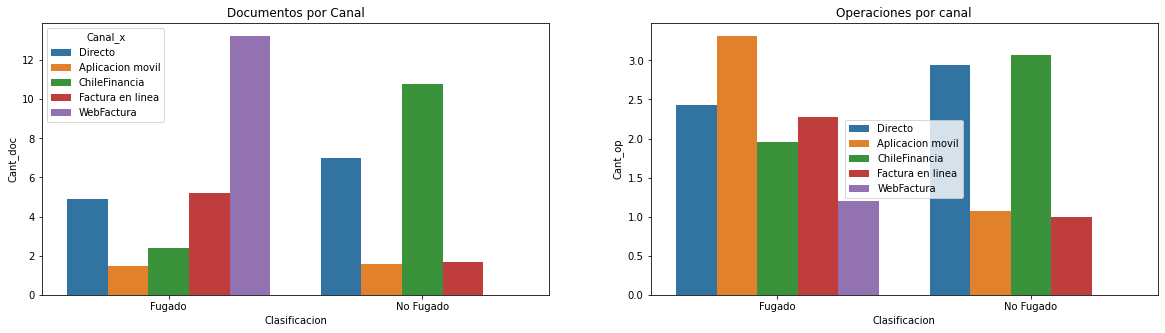

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs= plt.subplots(nrows=1,ncols=2, figsize=(20,5))
axs[0].set_title("Documentos por Canal")
sns.barplot(x=dfcli['Clasificacion'],ax=axs[0],y=dfcli['Cant_doc'], hue=dfcli['Canal_x'],ci=0)
axs[1].set_title("Operaciones por canal")
sns.barplot(x=dfcli['Clasificacion'],ax=axs[1],y=dfcli['Cant_op'], hue=dfcli['Canal_x'],ci=0)
plt.legend()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


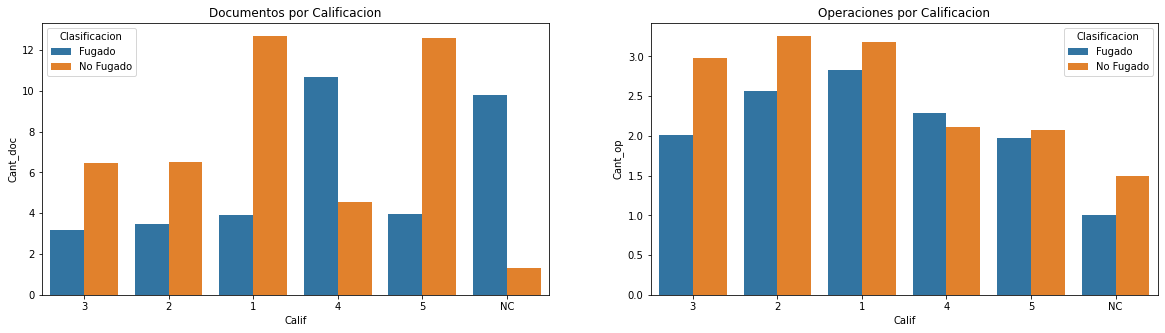

In [ ]:
dfcli3=dfcli[["Canal_x","fecha_ope","Calif._x","Cant_op","Cant_doc","Clasificacion"]]
dfcli3["Año"]=dfcli3["fecha_ope"].apply(lambda x: x[0:4])
dfcli3=dfcli3.drop(columns=["fecha_ope"])
dfcli3.columns=(['Canal','Calif','Cant_op', 'Cant_doc',"Clasificacion","Año"])
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs= plt.subplots(nrows=1,ncols=2, figsize=(20,5))
axs[0].set_title("Documentos por Calificacion")
sns.barplot(x=dfcli3['Calif'],ax=axs[0],y=dfcli3['Cant_doc'], ci=0,hue=dfcli3['Clasificacion'])
axs[1].set_title("Operaciones por Calificacion")
sns.barplot(x=dfcli3['Calif'],ax=axs[1],y=dfcli3['Cant_op'], ci=0,hue=dfcli3['Clasificacion'])

# Analisis Bivariable

In [ ]:
#Importamos las librerias

# Operaciones Basicas
import numpy as np
import pandas as pd
import pandas_profiling

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tabla de contingencia
tabla1 =pd.crosstab(dfclientes["Ha operado"],dfclientes.Canal)
tabla1


Canal,Aplicacion movil,ChileFinancia,Contador,Directo,Facto,Factura en linea,Laudus,OpenDTE,WebFactura
Ha operado,,,,,,,,,
No,10,484,7,4984,1,20,1,1,5
Sí,5,143,0,1780,0,9,0,0,3


In [ ]:
pd.crosstab(dfclientes["Ha operado"],dfclientes.Canal, normalize=True)

Canal,Aplicacion movil,ChileFinancia,Contador,Directo,Facto,Factura en linea,Laudus,OpenDTE,WebFactura
Ha operado,,,,,,,,,
No,0.001342,0.064940,0.000939,0.668724,0.000134,0.002683,0.000134,0.000134,0.000671
Sí,0.000671,0.019187,0.000000,0.238830,0.000000,0.001208,0.000000,0.000000,0.000403


In [ ]:
pd.crosstab(dfcli["Canal_x"],dfcli.Clasificacion)

Clasificacion,Fugado,No Fugado
Canal_x,,
Aplicacion movil,134,39
ChileFinancia,3559,2392
Directo,36010,22214
Factura en linea,528,24
WebFactura,94,0


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np
value1 = tabla1.values
print(chi2_contingency(value1)[0:3])

(8.527952362724625, 0.3836661516559774, 8)


In [ ]:
# Tabla de contingencia
pd.crosstab(dfcli.Clasificacion,dfcli.Estado)

Estado,Activo,Inactivo: Cliente insatisfecho (Enojado),Inactivo: El cliente no esta facturando,Inactivo: Linea de credito,Inactivo: NA,Inactivo: No califica cliente,Inactivo: No califican deudores,Inactivo: No esta interesado,Inactivo: No necesita financiamiento ahora,Inactivo: Opera con competencia,Inactivo: Prejudicial - Judicial
Clasificacion,,,,,,,,,,,
Fugado,31703,261,409,541,429,113,807,487,1274,1070,3231
No Fugado,18828,135,204,298,231,744,294,382,702,785,2066


In [ ]:
tabla2=pd.crosstab(dfclientes.Estado,dfclientes.Canal)
tabla2

Canal,Aplicacion movil,ChileFinancia,Contador,Directo,Facto,Factura en linea,Laudus,OpenDTE,WebFactura
Estado,,,,,,,,,
Activo,14,549,7,4844,1,16,1,1,5
Inactivo: Cliente insatisfecho (Enojado),0,1,0,13,0,0,0,0,0
Inactivo: El cliente no esta facturando,0,13,0,76,0,0,0,0,0
Inactivo: Linea de credito,0,4,0,29,0,0,0,0,0
Inactivo: NA,0,1,0,1210,0,9,0,0,3
Inactivo: No califica cliente,0,10,0,61,0,1,0,0,0
Inactivo: No califican deudores,0,1,0,82,0,0,0,0,0
Inactivo: No esta interesado,0,6,0,64,0,0,0,0,0
Inactivo: No necesita financiamiento ahora,0,24,0,182,0,2,0,0,0


In [ ]:
pd.crosstab(dfclientes.Estado,dfclientes.Canal, normalize=True)

Canal,Aplicacion movil,ChileFinancia,Contador,Directo,Facto,Factura en linea,Laudus,OpenDTE,WebFactura
Estado,,,,,,,,,
Activo,0.001878,0.073662,0.000939,0.649940,0.000134,0.002147,0.000134,0.000134,0.000671
Inactivo: Cliente insatisfecho (Enojado),0.000000,0.000134,0.000000,0.001744,0.000000,0.000000,0.000000,0.000000,0.000000
Inactivo: El cliente no esta facturando,0.000000,0.001744,0.000000,0.010197,0.000000,0.000000,0.000000,0.000000,0.000000
Inactivo: Linea de credito,0.000000,0.000537,0.000000,0.003891,0.000000,0.000000,0.000000,0.000000,0.000000
Inactivo: NA,0.000000,0.000134,0.000000,0.162351,0.000000,0.001208,0.000000,0.000000,0.000403
Inactivo: No califica cliente,0.000000,0.001342,0.000000,0.008185,0.000000,0.000134,0.000000,0.000000,0.000000
Inactivo: No califican deudores,0.000000,0.000134,0.000000,0.011002,0.000000,0.000000,0.000000,0.000000,0.000000
Inactivo: No esta interesado,0.000000,0.000805,0.000000,0.008587,0.000000,0.000000,0.000000,0.000000,0.000000
Inactivo: No necesita financiamiento ahora,0.000000,0.003220,0.000000,0.024420,0.000000,0.000268,0.000000,0.000000,0.000000


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np
value2 = tabla2.values
print(chi2_contingency(value2)[0:3])

(170.06702617675634, 1.8792690362198735e-08, 80)


Como Conclusión de las tablas de contingencia, se puede apreciar que no existe una dependencia de las variables catégoricas, ya que si usamos un nivel se significancia del 0,05 nuestro Pvalor para ambos casos sería mayor.

In [ ]:
Relaciones_montofac = df_total_cli.groupby(['Ha operado','Canal','Estado']).mean()[['monto_facturado']]
Relaciones_montofac

monto_facturado
Ha operado Canal            Estado                                                     
No         Directo          Inactivo: NA                                   8.497543e+07
Sí         Aplicacion movil Activo                                         1.668342e+07
                            Inactivo: Prejudicial - Judicial               6.114842e+06
           ChileFinancia    Activo                                         1.537838e+07
                            Inactivo: Cliente insatisfecho (Enojado)       4.318309e+06
                            Inactivo: El cliente no esta facturando        2.452666e+06
                            Inactivo: Linea de credito                     1.810926e+07
                            Inactivo: No califica cliente                  2.473258e+06
                            Inactivo: No esta interesado                   1.028345e+06
                            Inactivo: No necesita financiamiento ahora     7.194142e+06
                            Inactivo: Opera con competencia                1.138247e+07
                            Inactivo: Prejudicial - Judicial               1.314437e+07
           Directo          Activo                                         1.945787e+07
                            Inactivo: Cliente insatisfecho (Enojado)       9.060232e+06
                            Inactivo: El cliente no esta facturando        1.444036e+07
                            Inactivo: Linea de credito                     3.450163e+07
                            Inactivo: NA                                   1.457127e+07
                            Inactivo: No califica cliente                  2.659674e+07
                            Inactivo: No califican deudores                1.467004e+07
                            Inactivo: No esta interesado                   1.015624e+07
                            Inactivo: No necesita financiamiento ahora     1.314886e+07
                            Inactivo: Opera con competencia                1.193988e+07
                            Inactivo: Prejudicial - Judicial               1.508328e+07
           Factura en linea Activo                                         4.227978e+06
                            Inactivo: NA                                   1.115300e+05
                            Inactivo: No califica cliente                  1.360554e+08
                            Inactivo: No necesita financiamiento ahora     2.624738e+06
                            Inactivo: Prejudicial - Judicial               2.407349e+07
           WebFactura       Activo                                         2.440076e+06

A partir de la agrupación, se puede ver que aquellos que vienen del canal chilefinancia tienen mayor niveles de facturación.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


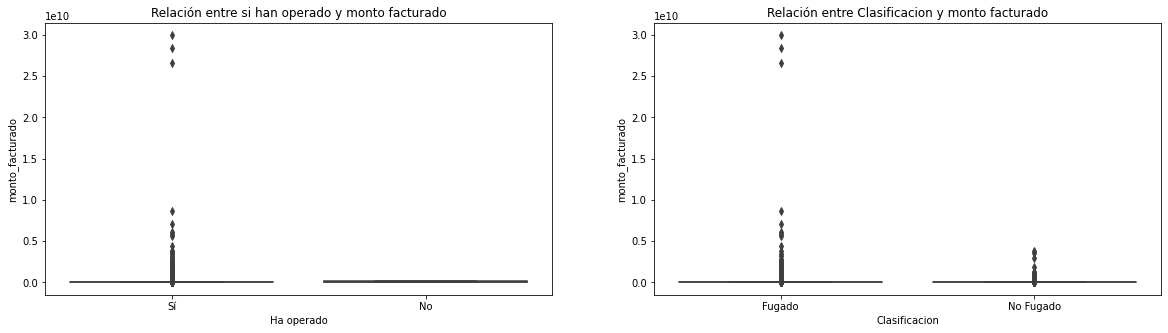

In [ ]:
# tresbps vs target
fig, axs= plt.subplots(nrows=1,ncols=2, figsize=(20,5))
axs[1].set_title("Relación entre Clasificacion y monto facturado")
axs[0].set_title("Relación entre si han operado y monto facturado")
sns.boxplot(df_total_cli['Ha operado'], df_total_cli['monto_facturado'],ax=axs[0])
sns.boxplot(dfcli['Clasificacion'], dfcli['monto_facturado'],ax=axs[1])

plt.show()

Aquellos clientes que no han operado tienen mayor dispersión en su monto facturado, lo que nos da como conclusión que la empresa apunta a clientes con una facturación más acotada.


#Analisis Multivariable

### Buscamos analizar como se relacionan las variables entre si.

## Vemos la correlacion que presentan estas variables.


<Figure size 720x480 with 0 Axes>

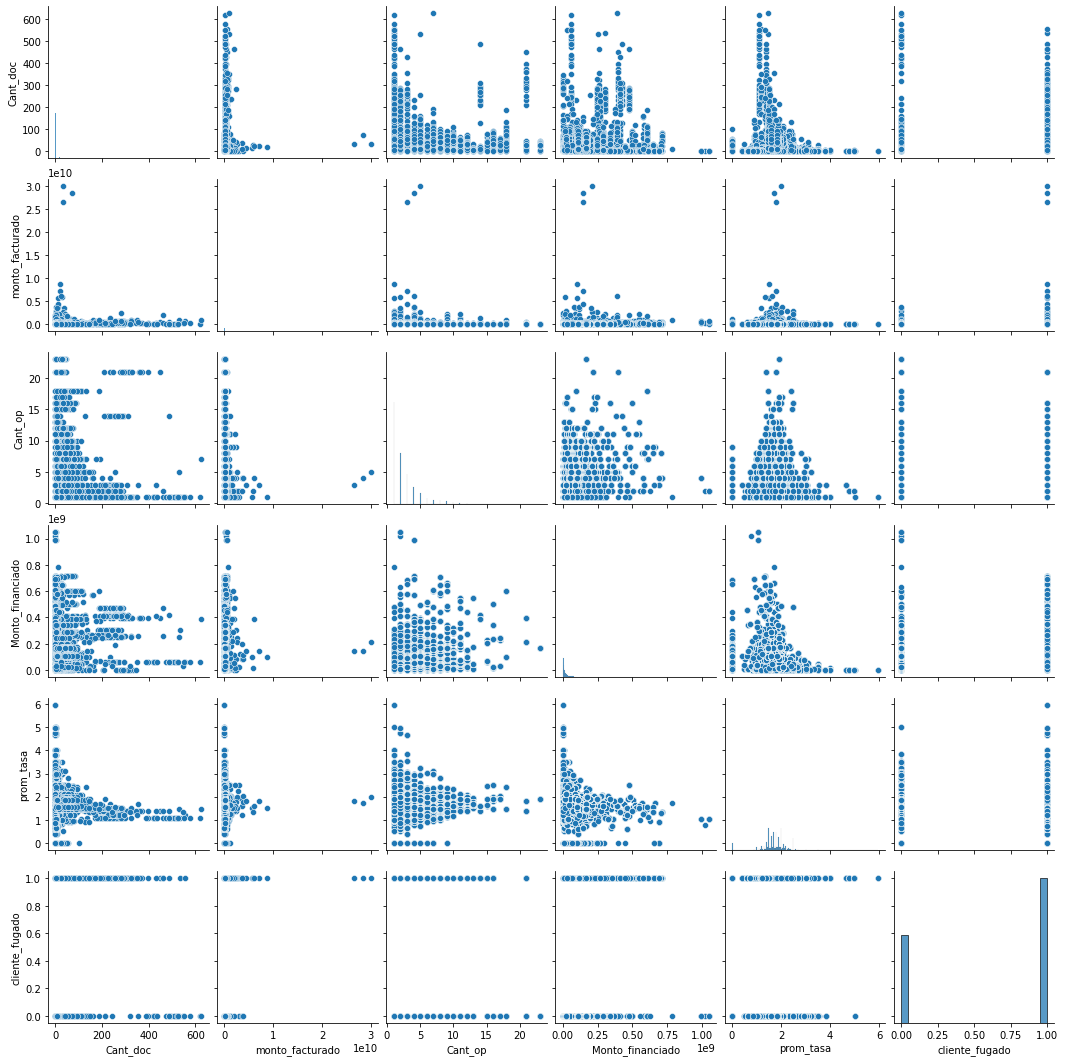

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=120)
sns.pairplot(dfcli)
plt.show()

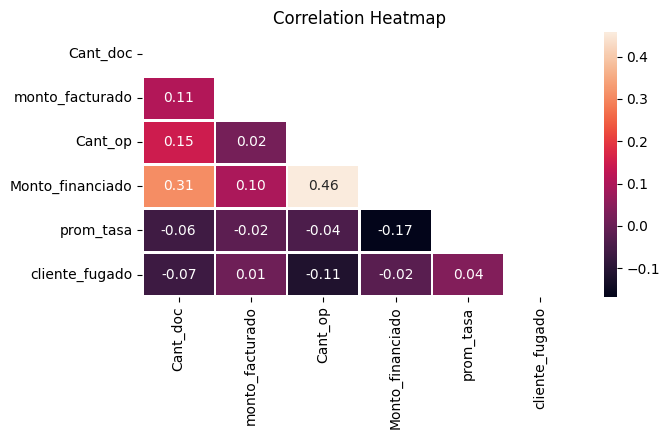

In [ ]:
plt.figure(dpi = 100,figsize= (7,3.5))
mask = np.triu(np.ones_like(dfcli.corr(),dtype = bool))
sns.heatmap(dfcli.corr(),mask = mask, fmt = ".2f",annot=True,lw=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dfcli["Año"]=dfcli["fecha_ope"].apply(lambda x: x[0:4])
t=dfcli.groupby(["Año"])['Cant_doc','Cant_op'].sum()
t


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Cant_doc,Cant_op
Año,,
2015,27,24
2016,323,472
2017,2231,2290
2018,7965,7224
2019,25499,16395
2020,100154,46822
2021,179991,75017
2022,53997,20631


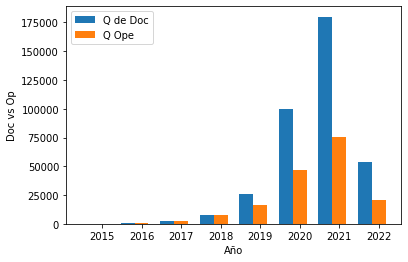

In [ ]:
serie_1 = t['Cant_doc']
serie_2 = t['Cant_op']
numero_de_grupos = len(list(t.index))
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
plt.bar(indice_barras, serie_1, width=ancho_barras, label="Q de Doc")
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Q Ope')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, (list(t.index)))
 
plt.ylabel('Doc vs Op')
plt.xlabel('Año')
plt.legend()
 
plt.show() 


# Algoritmos de Clasificación

## Arbol de decisión

In [ ]:
#df_total_cli[df_total_cli['cliente_fugado'] == 'Not Specified']
#df_total_cli.loc[df_total_cli['cliente_fugado'] == 'Not Specified','cliente_fugado']=0
#df_total_cli.loc[df_total_cli['cliente_fugado'] == '1','cliente_fugado']=1
#df_total_cli.loc[df_total_cli['cliente_fugado'] == "0",'cliente_fugado']=0

#df_total_cli['cliente_fugado'].unique()
dfcli.columns.values

array(['Rut_x', 'Canal_x', 'Calif._x', 'client_rut',
       'fecha_añomes_Emisión', 'Cant_doc', 'monto_facturado',
       'customer_rut', 'fecha_ope', 'Cant_op', 'Monto_financiado',
       'prom_tasa', 'Rut_y', 'Razón Social', 'Calif._y', 'Rep.Legal',
       'Contacto', 'Registro', 'Ejecutivo comercial', 'Canal_y',
       'Monto financiado', 'Verificado legalmente', 'Estado',
       'Verificado por riesgo', 'Habilitada cesión externa',
       'Disponible a fondo', 'Ha operado', 'Tasa preferencial', 'SII',
       'Última liquidación', 'Teléfono', 'Correo', 'Facturadores',
       'cliente_fugado', 'Clasificacion', 'Año'], dtype=object)

In [ ]:
df_algoritmo=dfcli[['monto_facturado',
'Cant_doc',
'Monto_financiado',
'Cant_op',
'prom_tasa',
'Verificado por riesgo',
'Verificado legalmente']]
y=dfcli[['cliente_fugado']]

print(df_algoritmo.columns.values)
print("\n", y.columns.values)

['monto_facturado' 'Cant_doc' 'Monto_financiado' 'Cant_op' 'prom_tasa'
 'Verificado por riesgo' 'Verificado legalmente']

 ['cliente_fugado']


In [ ]:
df_algoritmo_dummy = pd.get_dummies(df_algoritmo, drop_first=True)
x=pd.get_dummies(df_algoritmo, drop_first=True) ## Drop Frist, no tiene en cuenta la primera categoria. 
df_algoritmo_dummy

,monto_facturado,Cant_doc,Monto_financiado,Cant_op,prom_tasa,Verificado por riesgo_Verificado,Verificado legalmente_Verificado
0,45406533.0,4,22276899.0,1,1.6,1,1
1,1130500.0,1,1107890.0,1,1.6,1,1
2,1130500.0,1,1107890.0,1,1.6,1,1
3,773500.0,1,1107890.0,1,1.6,1,1
4,2780685.0,3,1107890.0,1,1.6,1,1
...,...,...,...,...,...,...,...
64989,6828843.0,6,6828843.0,1,3.0,0,0
64990,231010849.0,26,62572722.0,1,0.0,0,0
64991,116298736.0,27,62572722.0,1,0.0,0,0
64992,113267916.0,25,28788530.0,1,2.4,0,0


In [ ]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test
#Me quedo con 20% para test y 80% para train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
modelo1 = DecisionTreeClassifier(max_depth=8, random_state = 42,criterion='gini') #Creamos el modelo

In [ ]:
#Entrenamos el modelo
modelo1.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=8, random_state=42)

In [ ]:
y_test_pred = modelo1.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación en modelo de arbol de decision:',test_accuracy)

% de aciertos sobre el set de evaluación en modelo de arbol de decision: 0.6808985306562043


Matriz de Confusión Arbol de desicion:




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


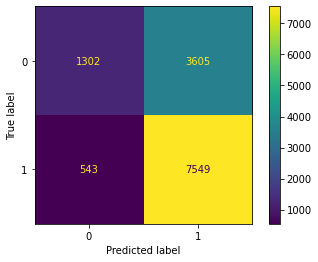

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
print('Matriz de Confusión Arbol de desicion:')
print("\n")
plot_confusion_matrix(modelo1, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import precision_score

precision=precision_score(y_test, y_test_pred)

# Precision!
print("Precisión de Árbol de decisión:",precision)

Precisión de Árbol de decisión: 0.676797561412946


In [ ]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 de Árbol de decisión: {f1_score(y_test, y_test_pred)}")

F1 de Árbol de decisión: 0.7844746960407357


In [ ]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall de Árbol de decisión: {recall_score(y_test, y_test_pred)}")

Recall de Árbol de decisión: 0.9328966880869995


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_test_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.71      0.27      0.39      4907
           1       0.68      0.93      0.78      8092

    accuracy                           0.68     12999
   macro avg       0.69      0.60      0.59     12999
weighted avg       0.69      0.68      0.63     12999



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


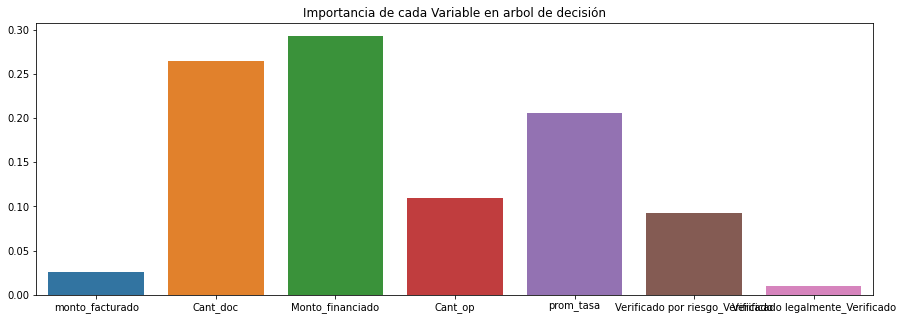

In [ ]:
plt.figure(figsize=(15,5))
importances = modelo1.feature_importances_
columns = x.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Variable en arbol de decisión')
plt.show()

## Regresión logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
regresion_logistica=LogisticRegression()

In [ ]:
x=pd.get_dummies(df_algoritmo, drop_first=True)
y=dfcli[['cliente_fugado']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LogisticRegression()
regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
prediccion=regressor.predict(x)
print(prediccion)

[1 1 1 ... 1 1 1]


In [ ]:
x["y"]=y
X_prob=x
X_prob["y_pred"]=prediccion
X_prob

,monto_facturado,Cant_doc,Monto_financiado,Cant_op,prom_tasa,Verificado por riesgo_Verificado,Verificado legalmente_Verificado,y,y_pred
0,45406533.0,4,22276899.0,1,1.6,1,1,1,1
1,1130500.0,1,1107890.0,1,1.6,1,1,0,1
2,1130500.0,1,1107890.0,1,1.6,1,1,0,1
3,773500.0,1,1107890.0,1,1.6,1,1,0,1
4,2780685.0,3,1107890.0,1,1.6,1,1,0,1
...,...,...,...,...,...,...,...,...,...
64989,6828843.0,6,6828843.0,1,3.0,0,0,1,1
64990,231010849.0,26,62572722.0,1,0.0,0,0,1,1
64991,116298736.0,27,62572722.0,1,0.0,0,0,1,1
64992,113267916.0,25,28788530.0,1,2.4,0,0,1,1


In [ ]:
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix( X_prob["y_pred"],X_prob["y"])

print('Matriz de Confusión regresión:')
print(matriz)


Matriz de Confusión regresión:
[[    0     0]
 [24669 40325]]


In [ ]:
#Calculo el accuracy en Test del regresion
test_accuracy = accuracy_score(X_prob["y"], X_prob["y_pred"])

print('% de aciertos sobre el set de evaluación en la regresioón:',test_accuracy)

% de aciertos sobre el set de evaluación en la regresioón: 0.6204418869434102


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=X_prob["y_pred"],y_true=X_prob["y"]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     24669
           1       0.62      1.00      0.77     40325

    accuracy                           0.62     64994
   macro avg       0.31      0.50      0.38     64994
weighted avg       0.38      0.62      0.48     64994



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(X_prob["y"], X_prob["y_pred"])) # MAE
print('Mean Squared Error:', metrics.mean_squared_error(X_prob["y"], X_prob["y_pred"])) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X_prob["y"],  X_prob["y_pred"]))) # RMSE


Mean Absolute Error: 0.3795581130565898
Mean Squared Error: 0.3795581130565898
Root Mean Squared Error: 0.6160828783991564


In [ ]:
from sklearn.metrics import r2_score
print('El r^2 es:',r2_score(X_prob["y_pred"],X_prob["y"]))

El r^2 es: 0.0


## KNN

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
y=dfcli[['cliente_fugado']]
x=pd.get_dummies(df_algoritmo, drop_first=True) ## Drop Frist, no tiene en cuenta la primera categoria. 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Importamos knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Creamos KNN Classifier para n=5
knn = KNeighborsClassifier(n_neighbors=5)

#Entrenamos el modelo usando el set de entrenamiento
knn.fit(X_train, y_train)

#Predecimos el valor, usando el X_Test
y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Matriz de Confusión de KNN:




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


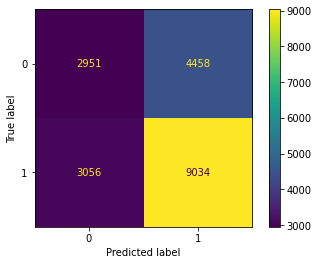

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
print('Matriz de Confusión de KNN:')
print("\n")
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [ ]:
#Calculo el accuracy en Test del randon forest
test_accuracy = accuracy_score(y_test, y_pred)

print('% de aciertos sobre el set de evaluación en KNN:',test_accuracy)

% de aciertos sobre el set de evaluación en KNN: 0.6146469049694856


In [ ]:
from sklearn.metrics import recall_score
# Recall
print(f"Recall de KNN: {recall_score(y_test, y_pred)}")

Recall de KNN: 0.7472291149710505


In [ ]:
from sklearn.metrics import f1_score
# Calculo del F1 score
print(f"F1 de KNN: {f1_score(y_test, y_pred)}")

F1 de KNN: 0.7062778516144164


In [ ]:
from sklearn.metrics import precision_score

precision=precision_score(y_test, y_pred)

# Precision!
print("Precisión de KNN:",precision)

Precisión de KNN: 0.6695819745034094


## Radom Forest

In [ ]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test
#Me quedo con 20% para test y 80% para train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 

In [ ]:
print("\n X_train")
print(X_train.size)
print("\n X_test")
print(X_test.size)
print("\n y_train")
print(y_train.size)
print("y_test")
print(y_test.size)


 X_train
363965

 X_test
90993

 y_train
51995
y_test
12999


In [ ]:
#Creamos un random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100, 
                               class_weight="balanced", max_features="log2") 
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [ ]:
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

In [ ]:
y_test_pred.size

12999

Matriz de Confusión Radom Forest:




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


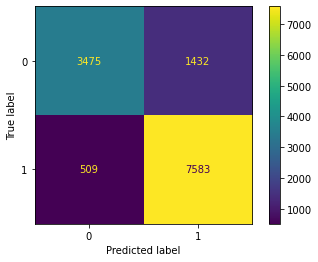

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
#matriz=confusion_matrix(y_test, y_test_pred)
#print('Matriz de Confusión randon forest:')
#print(matriz)
print('Matriz de Confusión Radom Forest:')
print("\n")
plot_confusion_matrix(model, X_test, y_test)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_test_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      4907
           1       0.84      0.94      0.89      8092

    accuracy                           0.85     12999
   macro avg       0.86      0.82      0.83     12999
weighted avg       0.85      0.85      0.85     12999



In [ ]:
#Calculo el accuracy en Test del randon forest
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy2 = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de evaluación datos test en Random Forest:',test_accuracy)
print('\n % de aciertos sobre el set de evaluación datos train en Random Forest:',test_accuracy2)

% de aciertos sobre el set de evaluación datos test en Random Forest: 0.8506808216016617

 % de aciertos sobre el set de evaluación datos train en Random Forest: 0.9997499759592269


In [ ]:
from sklearn.metrics import recall_score
# Recall
print(f"Recall de Random Rorest: {recall_score(y_test, y_test_pred)}")


Recall de Random Rorest: 0.9370983687592684


In [ ]:
from sklearn.metrics import f1_score
# Calculo del F1 score
print(f"F1 de Random Forest: {f1_score(y_test, y_test_pred)}")

F1 de Random Forest: 0.886537674636114


In [ ]:
from sklearn.metrics import precision_score

precision=precision_score(y_test, y_test_pred)

# Precision!
print("Precisión del Random Forest:",precision)

Precisión del Random Forest: 0.8411536328341653


###### Luego de hacer los modelos, segun cada linea, vemos el score promedio de todos los modelos

### Stratified- K fold (clasificacion) - Radom Forest

In [ ]:
# librerias
from numpy import mean
from numpy import std
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test
#Me quedo con 20% para test y 80% para train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 

In [ ]:
x=pd.get_dummies(df_algoritmo, drop_first=True)
y=dfcli[['cliente_fugado']]

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True
                      )
skf.get_n_splits(x, y)

10

In [ ]:
# Modelo vacio
model_vac = RandomForestClassifier(random_state=42, n_estimators=10, 
                               class_weight="balanced", max_features="log2") 

In [ ]:
from sklearn.metrics import accuracy_score
# Modelo vacio
model_vac = RandomForestClassifier(random_state=42, n_estimators=100, 
                               class_weight="balanced", max_features="log2")  
# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(x, y)):
  # Calculo de indices
  train, test = list(skf.split(x, y))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= x.iloc[train], y.iloc[train], x.iloc[test],y.iloc[test]
  # Ajustar el modelo
  model_vac.fit(X_train_n, y_train_n)
  # Predicciones
  pred= model_vac.predict(X_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('\n Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
import numpy as np
print('\n Accuracy promedio:', np.mean(list_ac))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



 Iteracion:  1  Accuracy: 0.8547692307692307


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



 Iteracion:  2  Accuracy: 0.8632307692307692


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



 Iteracion:  3  Accuracy: 0.8666153846153846


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



 Iteracion:  4  Accuracy: 0.852


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



 Iteracion:  5  Accuracy: 0.8653639021387906


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



 Iteracion:  6  Accuracy: 0.8575165410063087


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



 Iteracion:  7  Accuracy: 0.858132020310817


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



 Iteracion:  8  Accuracy: 0.8535159255270042


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



 Iteracion:  9  Accuracy: 0.8604400677027235


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]



 Iteracion:  10  Accuracy: 0.8601323280504694

 Accuracy promedio: 0.8591716169351498


### Randomized Search CV - Radom Forest



In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [ ]:
#Número de árboles en bosque aleatorio
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Número de características a considerar en cada división
max_features = ['auto', 'sqrt',"log2"]
# # Número máximo de niveles en el árbol
max_depth = [2,4,10,15,20,25,30,35]
# Número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [2, 5,10]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1,2,5,10]
# Método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 10, 15, 20, 25, 30, 35], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False]}


In [ ]:
model_vac2 = RandomForestClassifier()  

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv_1=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)    

In [ ]:

rf_RandomGrid=RandomizedSearchCV(estimator = model_vac2, param_distributions = param_grid, cv = cv_1, verbose=2, n_jobs = -1)
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 10, 15, 20, 25, 30,
                                                      35],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=2)

In [ ]:
rf_RandomGrid.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 70}

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.975
Test Accuracy - : 0.844


## AdaBoost Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 70% training and 30% test

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100,learning_rate=0.001)

In [ ]:
model = adaboost.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6518193707208246


## XGBoost 

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import xgboost as xgb #pip install xgboost
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [ ]:
clasificador_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=42,max_depth=20, learning_rate=0.1)

In [ ]:
clasificador_xgb.fit(X_train,y_train) #Entrenamos el modelo

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=20, n_estimators=10, seed=42)

In [ ]:
#y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clasificador_xgb.predict(X_test) #Prediccion en Test
y_train_pred= clasificador_xgb.predict(X_train) 

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de train:', train_accuracy)
print('\n % de aciertos sobre el set de test:',test_accuracy)

% de aciertos sobre el set de train: 0.9032214636022694

 % de aciertos sobre el set de test: 0.8536041233941072


### Randomized Search CV - XGBoost 

In [ ]:
params_grid = {
        'min_child_weight': [1, 5, 10,15,20],
        'gamma': [0.5, 1, 1.5, 2, 3,5,7.5],
        'subsample': [0.6, 0.8, 1.0,1.5],
        'colsample_bytree': [0.6, 0.8, 1.0,1.5],
        'max_depth': [1,5,6,7,10,15,20],
        'criterion':['entropy','gini',"accuracy"]
        }

In [ ]:
# Generamos el modelo vacio
clasificador_xgb=xgb.XGBClassifier()

In [ ]:
# Vemos cuales son los Hiperparametros, y cuales son los mejores para el modelo.
# Por otro lado, buscamos el que posea mayor accuracy

grid_cv = RandomizedSearchCV(clasificador_xgb, params_grid, scoring="accuracy", n_jobs=-1, cv=cv_1)
grid_cv.fit(X_train, y_train)
print("\n")
print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line



Mejores parametros {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 20, 'gamma': 0.5, 'criterion': 'entropy', 'colsample_bytree': 0.6}
Mejor score de CV 0.8979901571308091
Accuracy del modelo = 0.9013


In [ ]:
Mejores_parametros= {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 10, 'gamma': 1.5, 'criterion': 'entropy', 'colsample_bytree': 0.8}
Mejores_parametros


{'colsample_bytree': 0.8,
 'criterion': 'entropy',
 'gamma': 1.5,
 'max_depth': 10,
 'min_child_weight': 1,
 'subsample': 0.8}

## LightGBM

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb #pip install lightgbm
clf = lgb.LGBMClassifier(boosting_type='gbdt',max_depth=5,learning_rate=0.1,n_estimators=5)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.6556


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [ ]:
#Ahora comparemos con GBM
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 42,learning_rate=0.1, n_estimators=50)
gbrt.fit(X_train, y_train)
gbrt.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6652717090282478

In [ ]:
gbrt=GradientBoostingClassifier(random_state = 42)

In [ ]:
params_gradient = {
        'subsample': [0.6, 0.8, 1.0,1.5],
        'max_depth': [1,5,6,7,10],
        "learning_rate": sp_randFloat(),
        "subsample"    : sp_randFloat(),
        "n_estimators" : sp_randInt(10, 100),    
                 }



### Randomized Search CV - Gradient Boosting

In [ ]:
grid_cv = RandomizedSearchCV(gbrt, params_gradient, scoring="accuracy", n_jobs=-1, cv=cv_1)
grid_cv.fit(X_train, y_train)
print("\n")
print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Mejores parametros {'learning_rate': 0.5288023980032126, 'max_depth': 7, 'n_estimators': 95, 'subsample': 0.7336244953088877}
Mejor score de CV 0.8747973738202708
Accuracy del modelo = 0.86578
